## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge = pd.merge(mouse_metadata,study_results, how = "left", on = "Mouse ID")
# Display the data table for preview
merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_number = len(merge["Mouse ID"].unique())
mice_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = merge.loc[merge.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_df

array(['g989'], dtype=object)

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = clean_df.loc[clean_df["Mouse ID"]== "g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = merge.loc[merge["Mouse ID"]!= "g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Checking the number of mice in the clean DataFrame.
number_mice = len(clean_df["Mouse ID"].unique())
number_mice

248

## Summary Statistics

In [14]:
average = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
average

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [15]:
median = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [16]:
standard_dev = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
standard_dev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [17]:
sem = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
Drug_analysis = pd.DataFrame({"Average": average, "Median": median, "Standard Dev.": standard_dev, "SEM": sem})
Drug_analysis


,Average,Median,Standard Dev.,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary = clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)" : ["mean", "median"]})
# Using the aggregation method, produce the same summary statistics in a single line
summary

Tumor Volume (mm3)           
                           mean     median
Drug Regimen                              
Capomulin             40.675741  41.557809
Ceftamin              52.591172  51.776157
Infubinol             52.884795  51.820584
Ketapril              55.235638  53.698743
Naftisol              54.331565  52.509285
Placebo               54.033581  52.288934
Propriva              52.320930  50.446266
Ramicane              40.216745  40.673236
Stelasyn              54.233149  52.431737
Zoniferol             53.236507  51.818479

## Bar and Pie Charts

In [20]:
drug_group = clean_df.groupby('Drug Regimen')

# Count how many times each maker appears in our group
drug_makers = drug_group['Drug Regimen'].count()

drug_makers

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

<AxesSubplot:xlabel='Drug Regimen'>

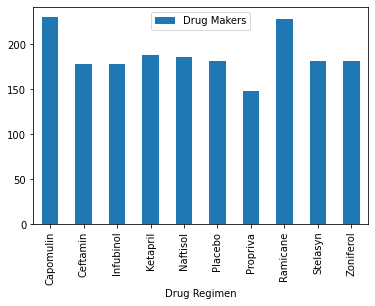

In [21]:
# # Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_bar = pd.DataFrame({"Drug Makers":drug_makers })
drug_bar.plot(kind="bar")

In [24]:
x_axis = np.arange(len(drug_makers))
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<BarContainer object of 10 artists>

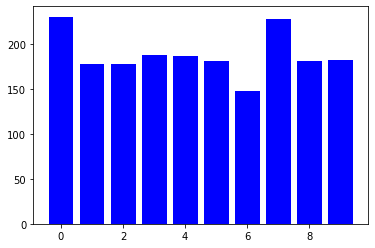

In [25]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(x_axis, drug_makers, color="b", align="center")

In [26]:
male_female = clean_df.groupby('Sex')

# Count how many times each maker appears in our group
mouse_sex = male_female['Mouse ID'].unique()

mouse_sex

Sex
Female    [s185, x401, j913, r554, m957, t565, a644, i73...
Male      [k403, m601, g791, s508, f966, m546, z578, u36...
Name: Mouse ID, dtype: object

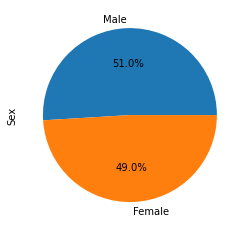

In [27]:
count = clean_df.Sex.value_counts()
count.plot(kind="pie",autopct="%1.1f%%")
plt.show()


In [28]:
male_df = clean_df.loc[clean_df["Sex"]== "Male"]
male = male_df["Mouse ID"].unique()
len(male)

125

In [29]:
female_df = clean_df.loc[clean_df["Sex"]== "Female"]
female = female_df["Mouse ID"].unique()
len(female)

123

In [31]:
sizes = [len(male),len(female) ]
colors = ["yellow","green"]
explode = (0.1, 0)

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# plt.pie(sizes, explode=explode, colors=colors,
#         autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x215a93fb400>,
 [Text(-0.03308201408261547, 1.0995024239828841, ''),
  Text(0.033082014082615095, -1.0995024239828841, '')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

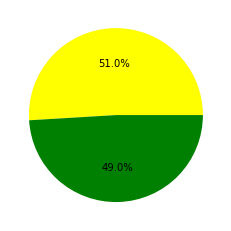

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(count, colors=colors,autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [34]:
# drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [39]:
tumor = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
tumor = tumor.reset_index()
final_df = tumor.merge(clean_df, on=["Mouse ID", "Timepoint"], how = "left")
final_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [99]:
specific_tumor_volume = final_df[final_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
specific_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [100]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [101]:
tumor_volume = []

In [118]:
for x in drugs:
    final_tumor_volume = specific_tumor_volume.loc[specific_tumor_volume["Drug Regimen"]== x,"Tumor Volume (mm3)"]
    tumor_volume.append(final_tumor_volume)
    quartiles =  final_tumor_volume.quantile([0.25,0.5,0.75])
    lower_quartiles = quartiles[0.25]
    upper_quartiles = quartiles[0.75]
    iqr = upper_quartiles-lower_quartiles

In [119]:
print(f"The lower quartile of Tumor Volume (mm3) is: {lower_quartiles}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upper_quartiles}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lower_quartiles- (1.5*iqr)
upper_bound = upper_quartiles + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume (mm3) is: 48.72207785
The upper quartile of Tumor Volume (mm3) is: 64.29983003
The interquartile range of Tumor Volume (mm3) is: 15.577752179999997
The the median of Tumor Volume (mm3) is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


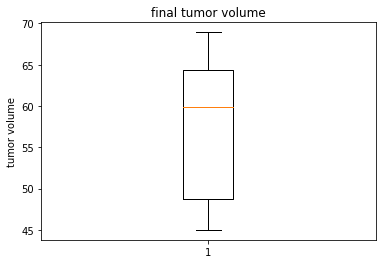

In [111]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('final tumor volume')
ax1.set_ylabel('tumor volume')
ax1.boxplot(final_tumor_volume)
plt.show()

## Line and Scatter Plots

In [45]:
line_df = clean_df.loc[clean_df["Drug Regimen"]== "Capomulin"].loc[clean_df["Mouse ID"]=="s185"]
line_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [46]:
scatter_df = clean_df.loc[clean_df["Drug Regimen"]== "Capomulin"]
scatter_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [47]:
scatter_average = scatter_df.groupby(["Mouse ID"]).mean()
scatter_average

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


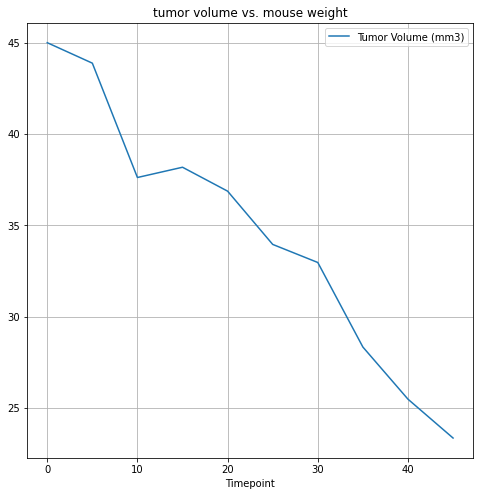

In [48]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="tumor volume vs. mouse weight")
plt.show()

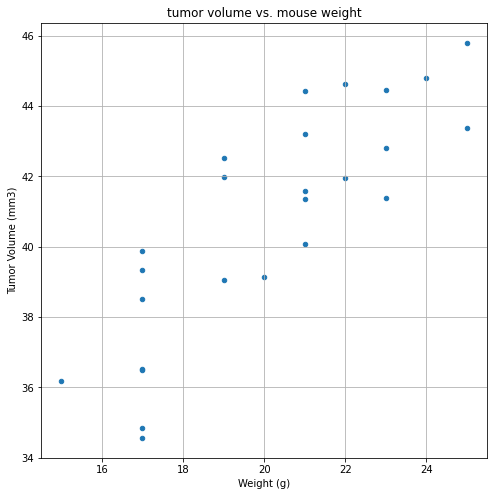

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_average.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="tumor volume vs. mouse weight")
plt.show()

## Correlation and Regression

In [112]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


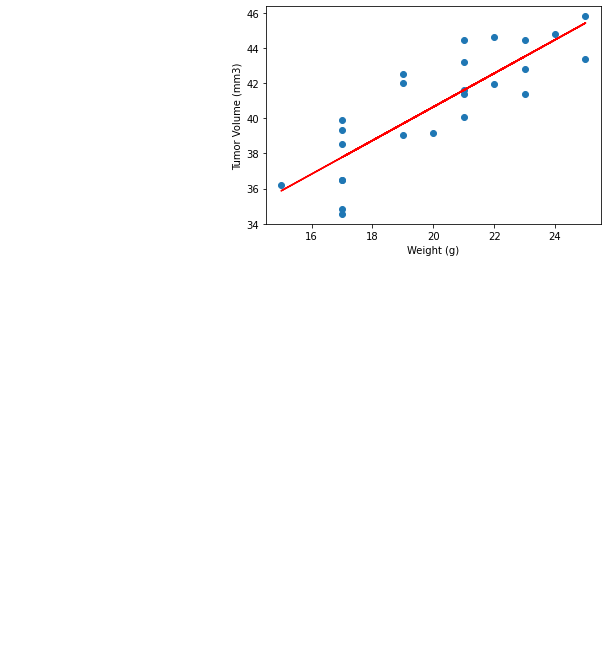

'y = 0.95x + 21.55'

In [116]:
# Linear Regression Model
x_values = scatter_average['Weight (g)']
y_values =scatter_average['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
line_eq

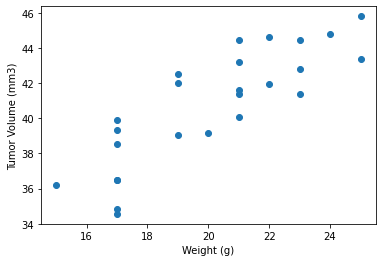

In [117]:
# Correlation Model
plt.scatter(scatter_average.iloc[:,1],scatter_average.iloc[:,3])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()